#Intro into IPython notebooks

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("qb7FT68tcA8", width=600, height=400, theme="light", color="blue")

In [3]:
# You can ignore this, it's just for aesthetic purposes
matplotlib.rcParams['figure.figsize'] = (8,5)
rcParams['savefig.dpi'] = 100

#Fitting Lines to Data

We'll cover very basic line fitting, largely ignoring the subtleties of the statistics in favor of showing you *how* to perform simple fits of models to data.

In [4]:
# These import commands set up the environment so we have access to numpy and pylab functions
import numpy as np
import pylab as pl

# Data Fitting
# First, we'll generate some fake data to use
x = np.linspace(0,10,50) # 50 x points from 0 to 10

# Remember, you can look at the help for linspace too:
# help(np.linspace)

In [5]:
# y = m x + b
y = 2.5 * x + 1.2

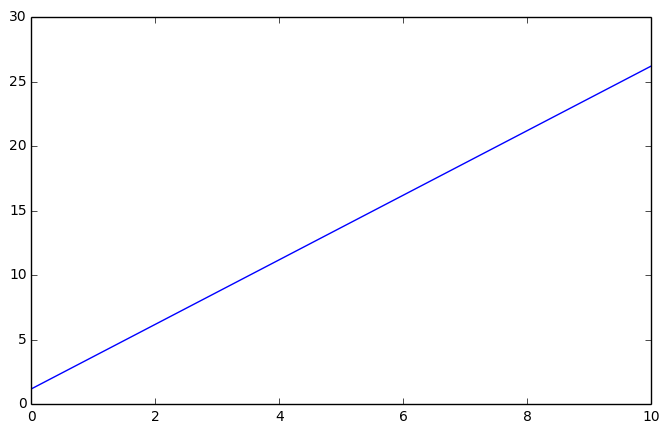

In [6]:
# let's plot that
pl.clf()
pl.plot(x,y)

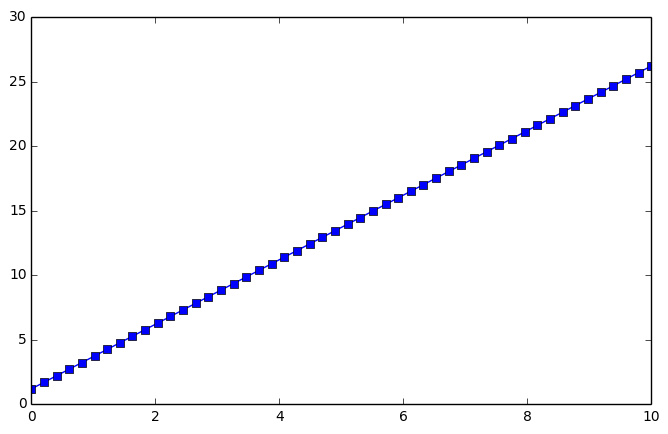

In [7]:
# looks like a simple line.  But we want to see the individual data points
pl.plot(x,y,marker='s')

In [8]:
# We need to add noise first
noise = pl.randn(y.size)
# Like IDL, python has a 'randn' function that is centered at 0 with a standard deviation of 1.  
# IDL's 'randomu' is 'pl.rand' instead
# What's y.size?
print y.size
print len(y)

50
50


`y.size` is the number of elements in y, just like `len(y)` or, in IDL, `n_elements(y)`

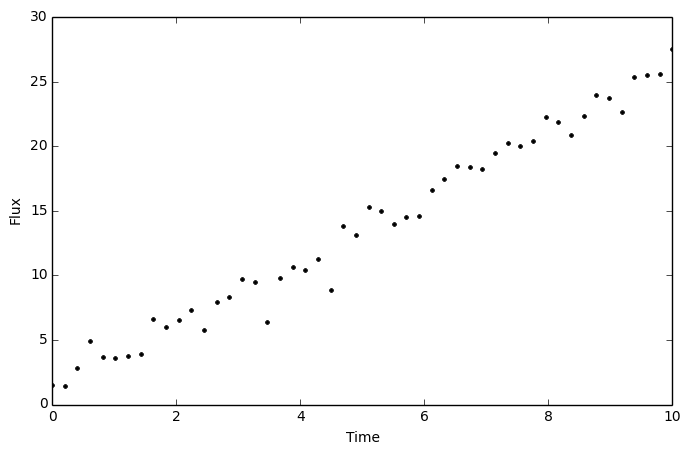

In [9]:
# We can add arrays in python just like in IDL
noisy_flux = y + noise
# We'll plot it too, but this time without any lines
# between the points, and we'll use black dots
# ('k' is a shortcut for 'black', '.' means 'point')
pl.clf() # clear the figure
pl.plot(x,noisy_flux,'k.')
# We need labels, of course
pl.xlabel("Time")
pl.ylabel("Flux")


Now we're onto the fitting stage.
We're going to fit a function of the form
$$y = m*x + b$$
which is the same as
$$f(x) = p[1]*x + p[0]$$
to the data.
This is called "linear regression", but it is also a special case of a more
general concept: this is a first-order polynomial.
"First Order" means that the highest exponent of x in the equation is 1


In [10]:
# We'll use polyfit to find the values of the coefficients.  The third
# parameter is the "order"
p = np.polyfit(x,noisy_flux,1)
# help(polyfit) if you want to find out more

In [11]:
# print our fit parameters.  They are not exact because there's noise in the data!
# note that this is an array!
print p
print type(p) # you can ask python to tell you what type a variable is

[ 2.51109656  1.08260561]
<type 'numpy.ndarray'>


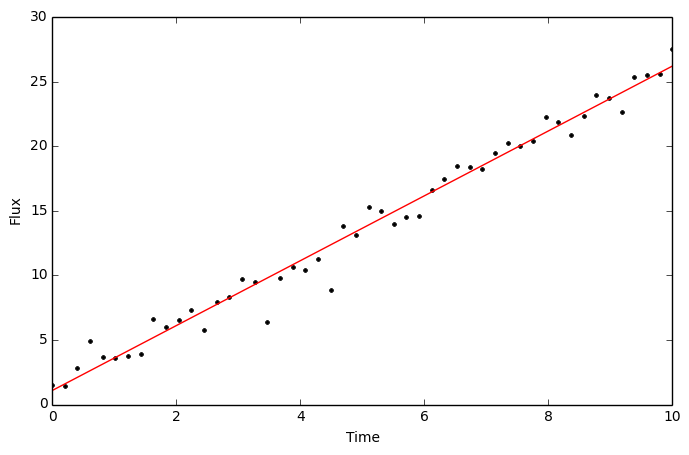

In [12]:
# Great!  We've got our fit.  Let's overplot the data and the fit now
pl.clf() # clear the figure
pl.plot(x,noisy_flux,'k.') # repeated from above
pl.plot(x,p[0]*x+p[1],'r-') # A red solid line
pl.xlabel("Time") # labels again
pl.ylabel("Flux")

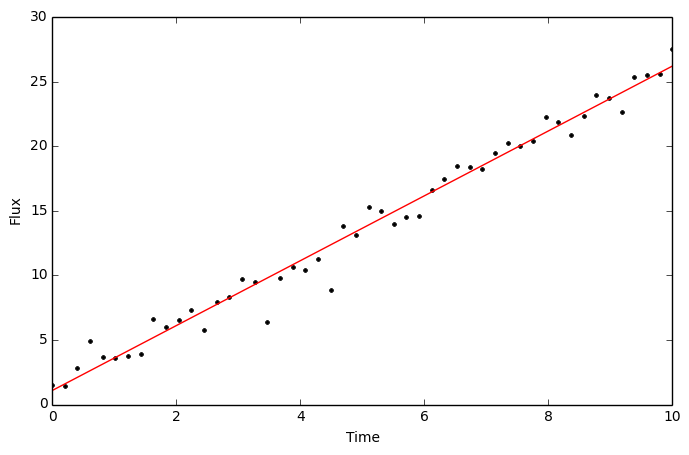

In [13]:
# Cool, but there's another (better) way to do this.  We'll use the polyval
# function instead of writing out the m x + b equation ourselves
pl.clf() # clear the figure
pl.plot(x,noisy_flux,'k.') # repeated from above
pl.plot(x,np.polyval(p,x),'r-') # A red solid line
pl.xlabel("Time") # labels again
pl.ylabel("Flux")

In [14]:
# help(polyval) if you want to find out more

Let's do the same thing with a noisier data set.  I'm going to leave out most of the comments this time.

In [15]:
noisy_flux = y+noise*10
p = polyfit(x,noisy_flux,1)
print p

[ 2.61096555  0.02605605]


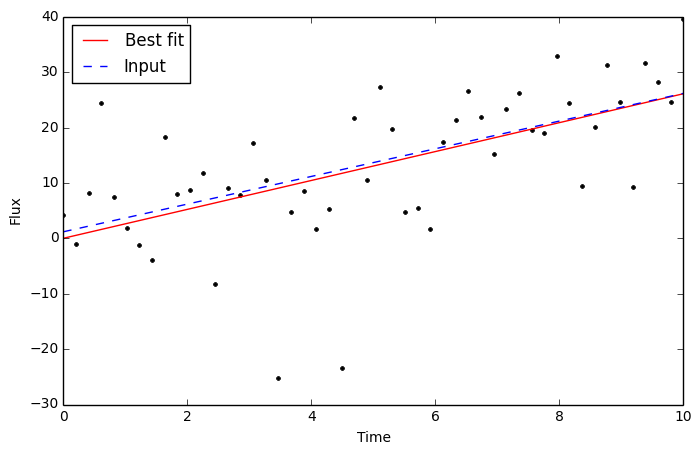

In [16]:
# plot it
pl.clf() # clear the figure
pl.plot(x,noisy_flux,'k.') # repeated from above
pl.plot(x,np.polyval(p,x),'r-',label="Best fit") # A red solid line
pl.plot(x,2.5*x+1.2,'b--',label="Input") # a blue dashed line showing the REAL line
pl.legend(loc='best') # make a legend in the best location
pl.xlabel("Time") # labels again
pl.ylabel("Flux")

Despite the noisy data, our fit is still pretty good!  One last plotting trick, then we'll move on.

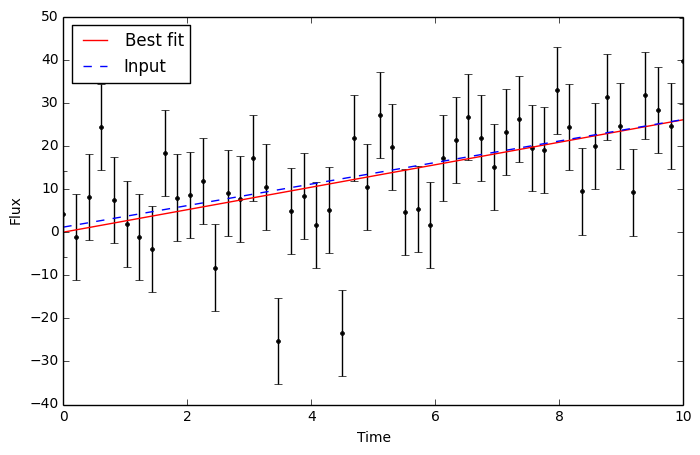

In [17]:
pl.clf() # clear the figure
pl.errorbar(x,noisy_flux,yerr=10,marker='.',color='k',linestyle='none') # errorbar requires some extras to look nice
pl.plot(x,np.polyval(p,x),'r-',label="Best fit") # A red solid line
pl.plot(x,2.5*x+1.2,'b--',label="Input") # a blue dashed line showing the REAL line
pl.legend(loc='best') # make a legend in the best location
pl.xlabel("Time") # labels again
pl.ylabel("Flux")

#Curve Fitting

We'll now move on to more complicated curves.  What if the data looks more like a sine curve?  We'll create "fake data" in basically the same way as above.

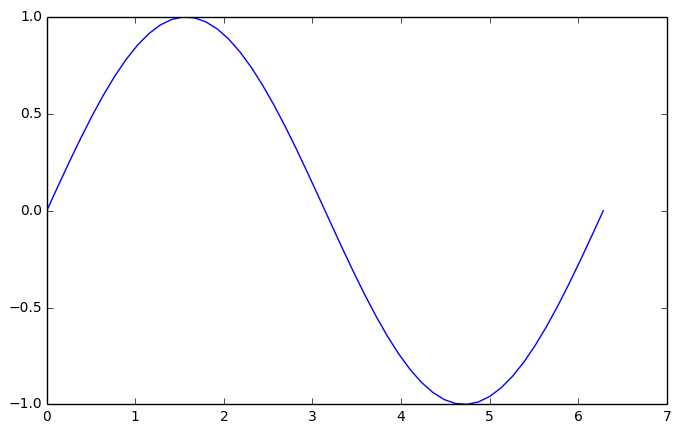

In [18]:
# this time we want our "independent variable" to be in radians
x = np.linspace(0,2*np.pi,50)
y = np.sin(x)
pl.clf()
pl.plot(x,y)

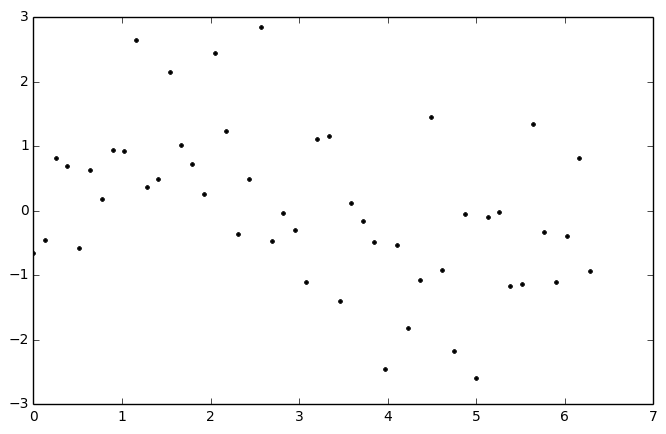

In [19]:
# We'll make it noisy again
noise = pl.randn(y.size)
noisy_flux = y + noise
pl.plot(x,noisy_flux,'k.') # no clear this time

That looks like kind of a mess.  Let's see how well we can fit it.
The function we're trying to fit has the form:
$$f(x) = A * sin(x - B)$$
where $A$ is a "scale" parameter and $B$ is the side-to-side offset (or the "delay" if the x-axis is time).  For our data, they are $A=1$ and $B=0$ respectively, because we made $y=sin(x)$

In [20]:
# curve_fit is the function we need for this, but it's in another package called scipy
from scipy.optimize import curve_fit
# we need to know what it does:
help(curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, **kw)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...).  It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : An M-length sequence or an (k,M)-shaped array
        for functions with k predictors.
        The independent variable where the data is measured.
    ydata : M-length sequence
        The dependent data --- nominally f(xdata, ...)
    p0 : None, scalar, or N-length sequence
        Initial guess for the parameters.  If None, then the initial
        values will all be 1 (if the number of parameters for the function
        can be determined using introspection, otherwise a ValueError
        is rais

Look at the returns:


    Returns
    -------
    popt : array
        Optimal values for the parameters so that the sum of the squared error
        of ``f(xdata, *popt) - ydata`` is minimized
    pcov : 2d array
        The estimated covariance of popt.  The diagonals provide the variance
        of the parameter estimate.
    

So the first set of returns is the "best-fit parameters", while the second set is the "covariance matrix"

In [21]:
def sinfunc(x,a,b):
    return a*np.sin(x-b)
fitpars, covmat = curve_fit(sinfunc,x,noisy_flux)
# The diagonals of the covariance matrix are variances
# variance = standard deviation squared, so we'll take the square roots to get the standard devations!
# You can get the diagonals of a 2D array easily:
variances = covmat.diagonal()
std_devs = np.sqrt(variances)
print fitpars,std_devs

[ 1.02709234  0.02889065] [ 0.20008943  0.19095993]


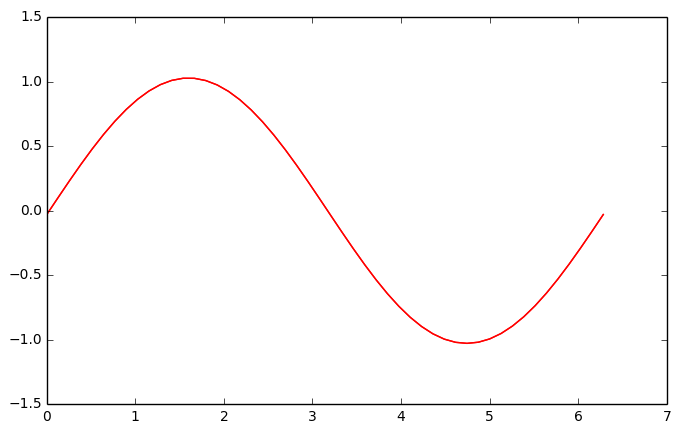

In [22]:
# Let's plot our best fit, see how well we did
# These two lines are equivalent:
pl.plot(x, sinfunc(x, fitpars[0], fitpars[1]), 'r-')
pl.plot(x, sinfunc(x, *fitpars), 'r-')

Again, this is pretty good despite the noisiness.

#Fitting a Power Law

Power laws occur all the time in physis, so it's a good idea to learn how to use them.

What's a power law?  Any function of the form:
$$f(t) = a t^b$$
where $x$ is your independent variable, $a$ is a scale parameter, and $b$ is the exponent (the power).

When fitting power laws, it's very useful to take advantage of the fact that "a power law is linear in log-space".
That means, if you take the log of both sides of the equation (which is allowed) and change variables, you get a 
linear equation!
$$\ln(f(t)) = \ln(a t^b) = \ln(a) + b \ln(t)$$
We'll use the substitutions $y=\ln(f(t))$, $A=\ln(a)$, and $x=\ln(t)$, so that
$$y=a+bx$$
which looks just like our linear equation from before (albeit with different letters for the fit parameters).

We'll now go through the same fitting exercise as before, but using powerlaws instead of lines.

In [23]:
t = np.linspace(0.1,10)  
a = 1.5
b = 2.5
z = a*t**b 

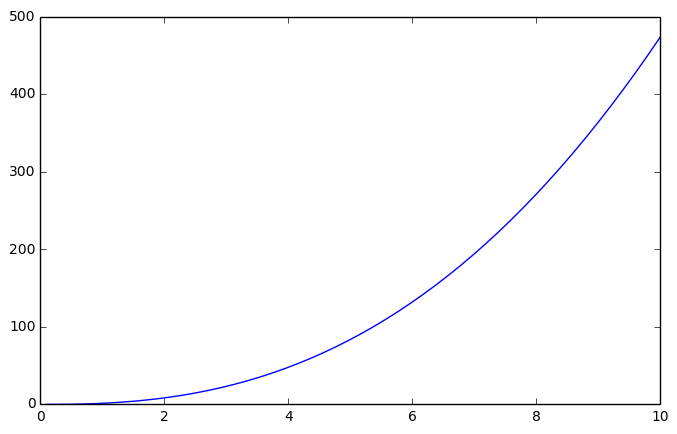

In [24]:
pl.clf()
pl.plot(t,z)

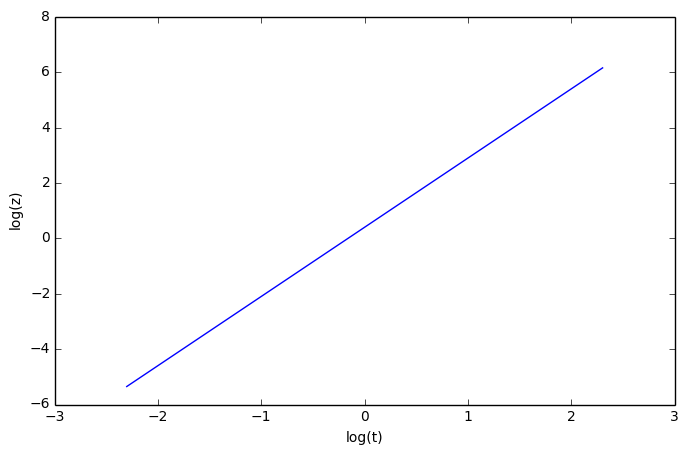

In [25]:
# Change the variables
# np.log is the natural log
y = np.log(z)
x = np.log(t)
pl.clf()
pl.plot(x,y)
pl.ylabel("log(z)")
pl.xlabel("log(t)")

It's a straight line.  Now, for our "fake data", we'll add the noise *before* transforming from "linear" to "log" space

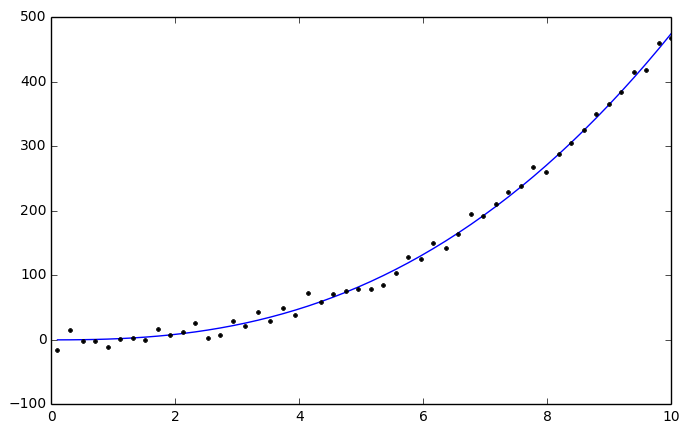

In [26]:
noisy_z = z + pl.randn(z.size)*10
pl.clf()
pl.plot(t,z)
pl.plot(t,noisy_z,'k.')

-c:1: RuntimeWarning: invalid value encountered in log


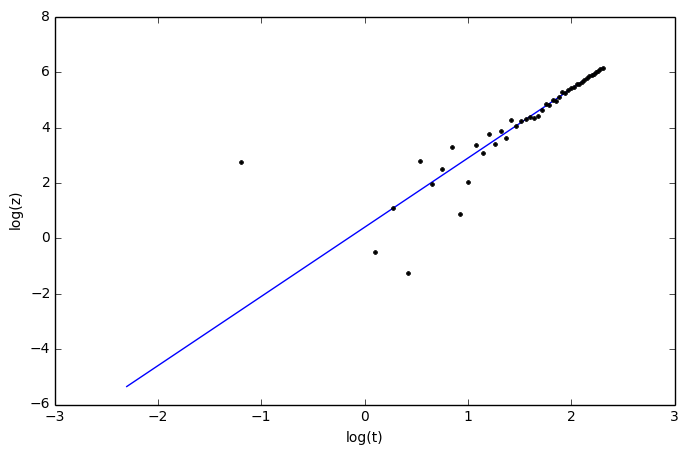

In [27]:
noisy_y = np.log(noisy_z)
pl.clf()
pl.plot(x,y)
pl.plot(x,noisy_y,'k.')
pl.ylabel("log(z)")
pl.xlabel("log(t)")

Note how different this looks from the "noisy line" we plotted earlier.  Power laws are much more sensitive to noise!  In fact, there are some data points that don't even show up on this plot because you can't take the log of a negative number.  Any points where the random noise was negative enough that the curve dropped below zero ended up being "NAN", or "Not a Number".  Luckily, our plotter knows to ignore those numbers, but `polyfit` doesnt.

In [28]:
print noisy_y

[        nan  2.75771666         nan         nan         nan -0.47965175
  1.11478478 -1.26005945  2.80987409  1.960784    2.51234432  3.28748507
  0.87394124  2.04142372  3.38148253  3.07025932  3.7646366   3.39576211
  3.89415046  3.63523727  4.28055748  4.05990115  4.25603083  4.31912881
  4.37483666  4.36715417  4.43359341  4.6376513   4.86019646  4.83042249
  5.01487092  4.95886081  5.09708006  5.27513912  5.2566149   5.34589262
  5.43611065  5.47480662  5.58954413  5.56268956  5.66424772  5.72223943
  5.785335    5.85617183  5.90007055  5.94997552  6.02859912  6.03561701
  6.13080122  6.14716578]


In [29]:
# try to polyfit a line
pars = np.polyfit(x,noisy_y,1)
print pars

[ nan  nan]


In order to get around this problem, we need to *mask the data*.  That means we have to tell the code to ignore all the data points where `noisy_y` is `nan`.

My favorite way to do this is to take advantage of a curious fact:  $1=1$, but `nan`!=`nan`

In [30]:
print 1 == 1
print np.nan == np.nan

True
False


So if we find all the places were `noisy_y` != `noisy_y`, we can get rid of them.  Or we can just use the places where `noisy_y` equals itself.

In [31]:
OK = noisy_y == noisy_y
print OK

[False  True False False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


This `OK` array is a "boolean mask".  We can use it as an "index array", which is pretty neat.  

In [32]:
print "There are %i OK values" % (OK.sum())
masked_noisy_y = noisy_y[OK]
masked_x = x[OK]
print "masked_noisy_y has length",len(masked_noisy_y)

There are 46 OK values
masked_noisy_y has length 46


In [33]:
# now polyfit again
pars = np.polyfit(masked_x,masked_noisy_y,1)
print pars

[ 2.05726448  1.10149221]


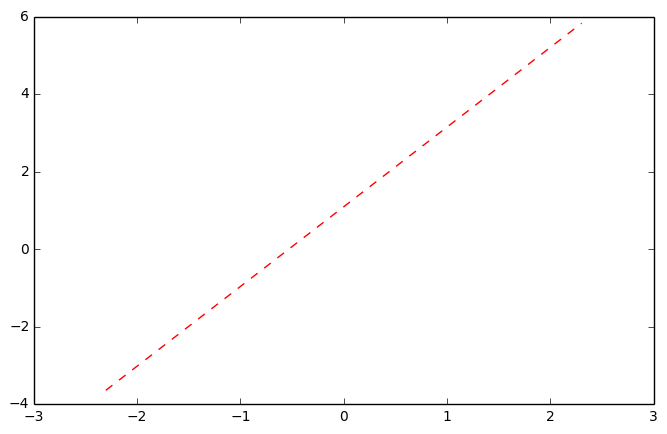

In [34]:
# cool, it worked.  But the fit looks a little weird!
fitted_y = polyval(pars,x)
pl.plot(x, fitted_y, 'r--')

The noise seems to have affected our fit. 

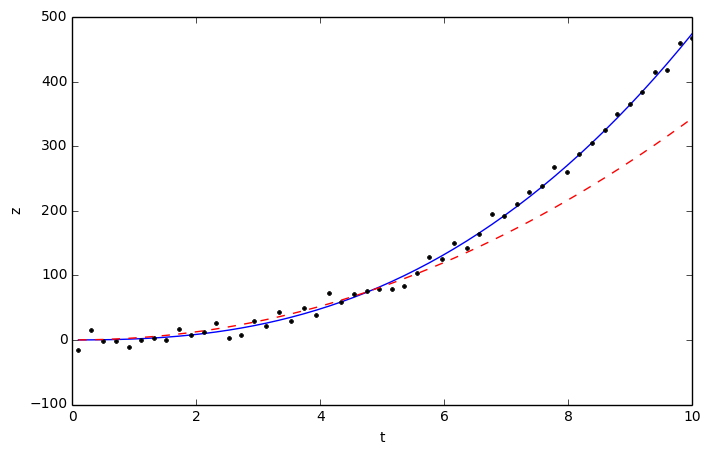

In [35]:
# Convert bag to linear-space to see what it "really" looks like
fitted_z = np.exp(fitted_y)
pl.clf()
pl.plot(t,z)
pl.plot(t,noisy_z,'k.')
pl.plot(t,fitted_z,'r--')
pl.xlabel('t')
pl.ylabel('z')

That's pretty bad.  A "least-squares" approach, as with `curve_fit`, is probably going to be the better choice.  However, in the absence of noise (i.e., on your homework), this approach *should* work

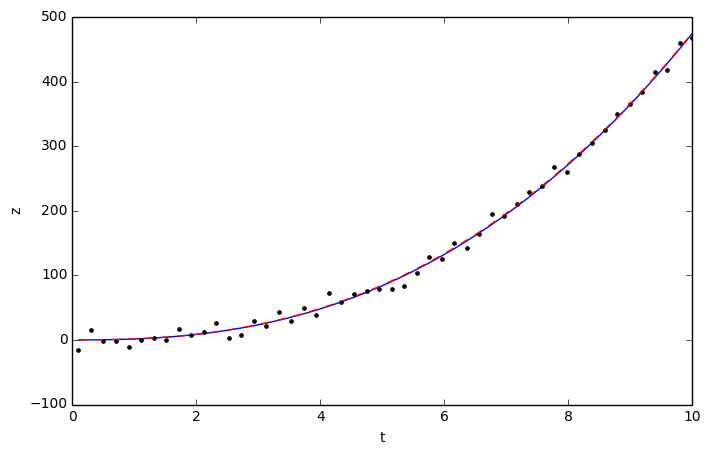

In [36]:
def powerlaw(x,a,b):
    return a*(x**b)
pars,covar =  curve_fit(powerlaw,t,noisy_z)
pl.clf()
pl.plot(t,z)
pl.plot(t,noisy_z,'k.')
pl.plot(t,powerlaw(t,*pars),'r--')
pl.xlabel('t')
pl.ylabel('z')

#Tricks with Arrays

We need to cover a few syntactic things comparing IDL and python.

In IDL, if you wanted the maximum value in an array, you would do:  
`maxval = max(array, location_of_max)`


In python, it's more straightforward:  
`location_of_max = array.argmax()`  
or   
`location_of_max = np.argmax(array)`  

Now, say we want to determine the location of the maximum of a number of different functions.  The functions we'll use are:  
`sin(x)`  
`sin`$^2$`(x)`  
`sin`$^3$`(x)`  
`sin(x)cos(x)`  

We'll define these functions, then loop over them. 

In [37]:
# sin(x) is already defined
def sin2x(x):
    """ sin^2 of x """
    return np.sin(x)**2
def sin3x(x):
    """ sin^3 of x """
    return np.sin(x)**3
def sincos(x):
    """ sin(x)*cos(x) """
    return np.sin(x)*np.cos(x)
list_of_functions = [np.sin, sin2x, sin3x, sincos]

In [38]:
# we want 0-2pi for these functions
t = np.linspace(0,2*np.pi)
# this is the cool part: we can make a variable function
for fun in list_of_functions:
    # the functions know their own names (in a "secret hidden variable" called __name__)
    print "The maximum of ",fun.__name__," is ", fun(t).max()

The maximum of  sin  is  0.999486216201
The maximum of  sin2x  is  0.998972696375
The maximum of  sin3x  is  0.998459440388
The maximum of  sincos  is  0.4997431081


In [39]:
# OK, but we wanted the location of the maximum....
for fun in list_of_functions:
    print "The location of the maximum of ",fun.__name__," is ", fun(t).argmax()

The location of the maximum of  sin  is  12
The location of the maximum of  sin2x  is  12
The location of the maximum of  sin3x  is  12
The location of the maximum of  sincos  is  6


In [40]:
# well, that's not QUITE what we want, but it's close
# We want to know the value of t, not the index!
for fun in list_of_functions:
    print "The location of the maximum of ",fun.__name__," is ", t[fun(t).argmax()]

The location of the maximum of  sin  is  1.5387392589
The location of the maximum of  sin2x  is  1.5387392589
The location of the maximum of  sin3x  is  1.5387392589
The location of the maximum of  sincos  is  0.769369629451


In [41]:
# Finally, what if we want to store all that in an array?
# Well, here's a cool trick: you can sort of invert the for loop
# This is called a "list comprehension":
maxlocs = [ t[fun(t).argmax()] for fun in list_of_functions ]
print maxlocs

[1.5387392589011231, 1.5387392589011231, 1.5387392589011231, 0.76936962945056153]


In [42]:
# Confused?  OK.  Try this one:
print range(6)
print [ii**2 for ii in range(6)]

[0, 1, 2, 3, 4, 5]
[0, 1, 4, 9, 16, 25]


#Further info on IPython Notebooks

|               Overview               |                                        link                                        |
|--------------------------------------|------------------------------------------------------------------------------------|
| Blog of  IPython creator         | http://blog.fperez.org/2012/09/blogging-with-ipython-notebook.html                     |
| Blog of an avid IPython user         | http://www.damian.oquanta.info/index.html                                          |
| Turning notebook into a presentation | https://www.youtube.com/watch?v=rBS6hmiK-H8                                        |
| Tutorial on IPython & SciPy          | https://github.com/esc/scipy2013-tutorial-numpy-ipython                            |
| IPython notebooks gallery            | https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks |


In [43]:
from IPython.display import YouTubeVideo
YouTubeVideo("xe_ATRmw0KM", width=600, height=400, theme="light", color="blue")

In [44]:
from IPython.display import YouTubeVideo
YouTubeVideo("zG8FYPFU9n4", width=600, height=400, theme="light", color="blue")